QUESTION 1

1.1 Combine the data from all three years into a single dataset by selecting only the relevant columns and adding an
indicator column to specify the year of each survey.

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
query = "SELECT YearsCode, MainBranch, Country, EdLevel, LanguageHaveWorkedWith, LanguageWantToWorkWith, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, Age FROM"

con = sqlite3.connect("data/Github.db")

# Read in the three years of survey data
df_2021 = pd.read_sql_query(f"{query} data_2021", con)
df_2022 = pd.read_sql_query(f"{query} data_2022", con)
df_2023 = pd.read_sql_query(f"{query} data_2023", con)

In [3]:
# Add year indicator column to each dataframe
df_2021['year'] = 2021
df_2022['year'] = 2022
df_2023['year'] = 2023

# Combine all three years into a single dataframe
df = pd.concat([df_2021, df_2022, df_2023], ignore_index=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180369 entries, 0 to 180368
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   YearsCode               176306 non-null  object
 1   MainBranch              180369 non-null  object
 2   Country                 178591 non-null  object
 3   EdLevel                 178282 non-null  object
 4   LanguageHaveWorkedWith  176794 non-null  object
 5   LanguageWantToWorkWith  165052 non-null  object
 6   DatabaseHaveWorkedWith  149609 non-null  object
 7   DatabaseWantToWorkWith  125252 non-null  object
 8   Age                     178761 non-null  object
 9   year                    180369 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 13.8+ MB


1.2 Standardize the Country column, ensuring consistency in naming for countries with variations.

In [5]:
country = df["Country"].value_counts()
print(country.to_string())

Country
United States of America                                34564
India                                                   15737
Germany                                                 13973
United Kingdom of Great Britain and Northern Ireland    10566
Canada                                                   6710
France                                                   6019
Poland                                                   4580
Brazil                                                   4537
Netherlands                                              4393
Australia                                                3896
Italy                                                    3815
Spain                                                    3533
Sweden                                                   2953
Russian Federation                                       2742
Switzerland                                              2241
Turkey                                                   2185


In [6]:
replacements = {
  'United Kingdom of Great Britain and Northern Ireland' : 'United Kingdom',
  'Russian Federation' : 'Russia',
  'Iran, Islamic Republic of...' : 'Iran',
  'Viet Nam': 'Vietnam',
  'Hong Kong (S.A.R.)': 'Hong Kong',
  'Venezuela, Bolivarian Republic of...': 'Venezuela',
  'Republic of Korea': 'South Korea',
  'The former Yugoslav Republic of Macedonia': 'North Macedonia',
  'Republic of Moldova': 'Moldova',
  'Syrian Arab Republic': 'Syria',
  'United Republic of Tanzania': 'Tanzania',
  'Libyan Arab Jamahiriya': 'Libya',
  'Congo, Republic of the...' : 'Congo',
  "Lao People's Democratic Republic": 'Laos',
  'Micronesia, Federated States of...': 'Micronesia',
  'Brunei Darussalam': 'Brunei',  
  "Democratic People's Republic of Korea": 'North Korea',
}

df['Country'] = df['Country'].replace(replacements)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180369 entries, 0 to 180368
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   YearsCode               176306 non-null  object
 1   MainBranch              180369 non-null  object
 2   Country                 178591 non-null  object
 3   EdLevel                 178282 non-null  object
 4   LanguageHaveWorkedWith  176794 non-null  object
 5   LanguageWantToWorkWith  165052 non-null  object
 6   DatabaseHaveWorkedWith  149609 non-null  object
 7   DatabaseWantToWorkWith  125252 non-null  object
 8   Age                     178761 non-null  object
 9   year                    180369 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 13.8+ MB


1.3 Handle missing data and subsetting the dataset to include a manageable selection of countries to facilitate clear
visualizations and analysis. Justify your choices for missing value treatment and country selection.

In [8]:
# Drop all rows with any missing values in Country column because country is the primary variable
df = df.dropna(subset=['Country'])

# Replace missing values with median to minimize impact of outliers
if df['YearsCode'].isnull().sum() > 0:
    df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')
    median = df['YearsCode'].median()
    df['YearsCode'] = df['YearsCode'].fillna(median)
    
# Replace missing values with mode (most common value) because mean/median don't apply.
cols = ['MainBranch', 'EdLevel']
for col in cols:
    if col and df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])
        

In [9]:
# Selecting the most represented countries (top 10)
top_10 = df['Country'].value_counts().head(10).index.tolist()
df = df[df['Country'].isin(top_10)]

In [10]:
country = df["Country"].value_counts()
print(country.to_string())

Country
United States of America    34564
India                       15737
Germany                     13973
United Kingdom              10566
Canada                       6710
France                       6019
Poland                       4580
Brazil                       4537
Netherlands                  4393
Australia                    3896


1.4 Categorize the values in the MainBranch column into meaningful groups to provide a clear understanding of
respondent roles.

In [11]:
# Create mapping dictionary for MainBranch categories
main_branch_mapping = {
    'I am a developer by profession': 'Professional Developer',
    'I am a student who is learning to code': 'Student',
    'I am learning to code': 'Student',	
    'I code primarily as a hobby': 'Hobbyist/Occasional Coder',
    'I used to be a developer by profession, but no longer am': 'Other',
    'I am not primarily a developer, but I write code sometimes as part of my work': 'Hobbyist/Occasional Coder',
    'I am not primarily a developer, but I write code sometimes as part of my work/studies ': 'Hobbyist/Occasional Coder',
    'None of these': 'Other'
}

# Apply mapping to create new categorized column
df['MainBranchCategory'] = df['MainBranch'].map(main_branch_mapping)

In [12]:
df['MainBranchCategory'].value_counts()

MainBranchCategory
Professional Developer       78765
Hobbyist/Occasional Coder    10930
Student                       7744
Other                         2131
Name: count, dtype: int64

1.5 Reclassify the EdLevel column into broader educational categories to create concise, interpretable groupings.

In [13]:
df['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          46458
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       23533
Some college/university study without earning a degree                                12578
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    10425
Associate degree (A.A., A.S., etc.)                                                    3310
Primary/elementary school                                                              2375
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2374
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1721
Something else                                                                         1699
Professional degree (JD, MD, etc.)                                                      502
Name: count, dtype: int64

In [14]:
# Reclassify EdLevel into broader categories:
    # - No formal education / Primary
    # - Secondary education
    # - Bachelor's degree
    # - Master's degree
    # - Doctoral degree
    # - Professional degree


df['EdLevel'] = df['EdLevel'].replace({
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master's degree",
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor's degree",
    "Other doctoral degree (Ph.D., Ed.D., etc.)": "Doctoral degree",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary education",
    "Professional degree (JD, MD, etc.)": "Doctoral degree",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)": "Doctoral degree",
    "Some college/university study without earning a degree": "Secondary education",
    "Primary/elementary school": "No formal education / Primary",
    "Associate degree (A.A., A.S., etc.)": "Secondary education",
    "Something else": "Other"
})



In [15]:
df['EdLevel'].value_counts()

EdLevel
Bachelor's degree                46458
Secondary education              26313
Master's degree                  23533
Doctoral degree                   4597
No formal education / Primary     2375
Other                             1699
Name: count, dtype: int64

QUESTION 2

2.1 Use visualizations and descriptive statistics to explore the dataset and answer the following questions. Provide clear
insights to support your analysis

1. Demographics and Roles
  



    1. How has the number of users in each MainBranch category changed over three years?


<Figure size 1200x600 with 0 Axes>

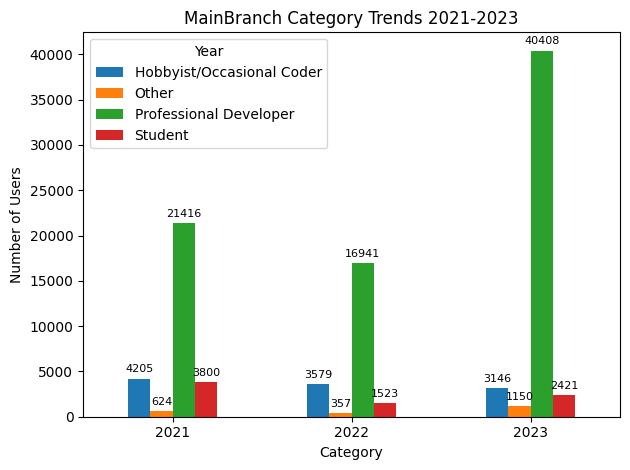

In [16]:
# Group by MainBranchCategory and year, and count the number of users in each category
df_grouped = df.groupby(['year','MainBranchCategory']).size().unstack(fill_value=0)

# Plot the trends
plt.figure(figsize=(12, 6))
ax = df_grouped.plot(kind='bar')
plt.title('MainBranch Category Trends 2021-2023')
plt.xlabel('Category')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.legend(title='Year')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8, padding=3)

plt.tight_layout()
plt.show()

"Professional Developer" category remains the dominant user group, showing substantial growth from 21416 users in 2021 to 40408 in 2023, nearly doubling in size.

The "Student" category has seen a significant decrease from 2021 to 2023, indicating a change in survey methodology.

The "Hobbyist" category has seen a slight decrease from 2021 to 2023, suggesting that fewer people are identifying as hobbyist coders or non-developers who code occasionally.

These trends indicate GitHub's expanding reach among professional developers. 

    2. What are the trends in users' Age, Country, EdLevel, and YearsCode across different MainBranch categories?


<Figure size 1200x600 with 0 Axes>

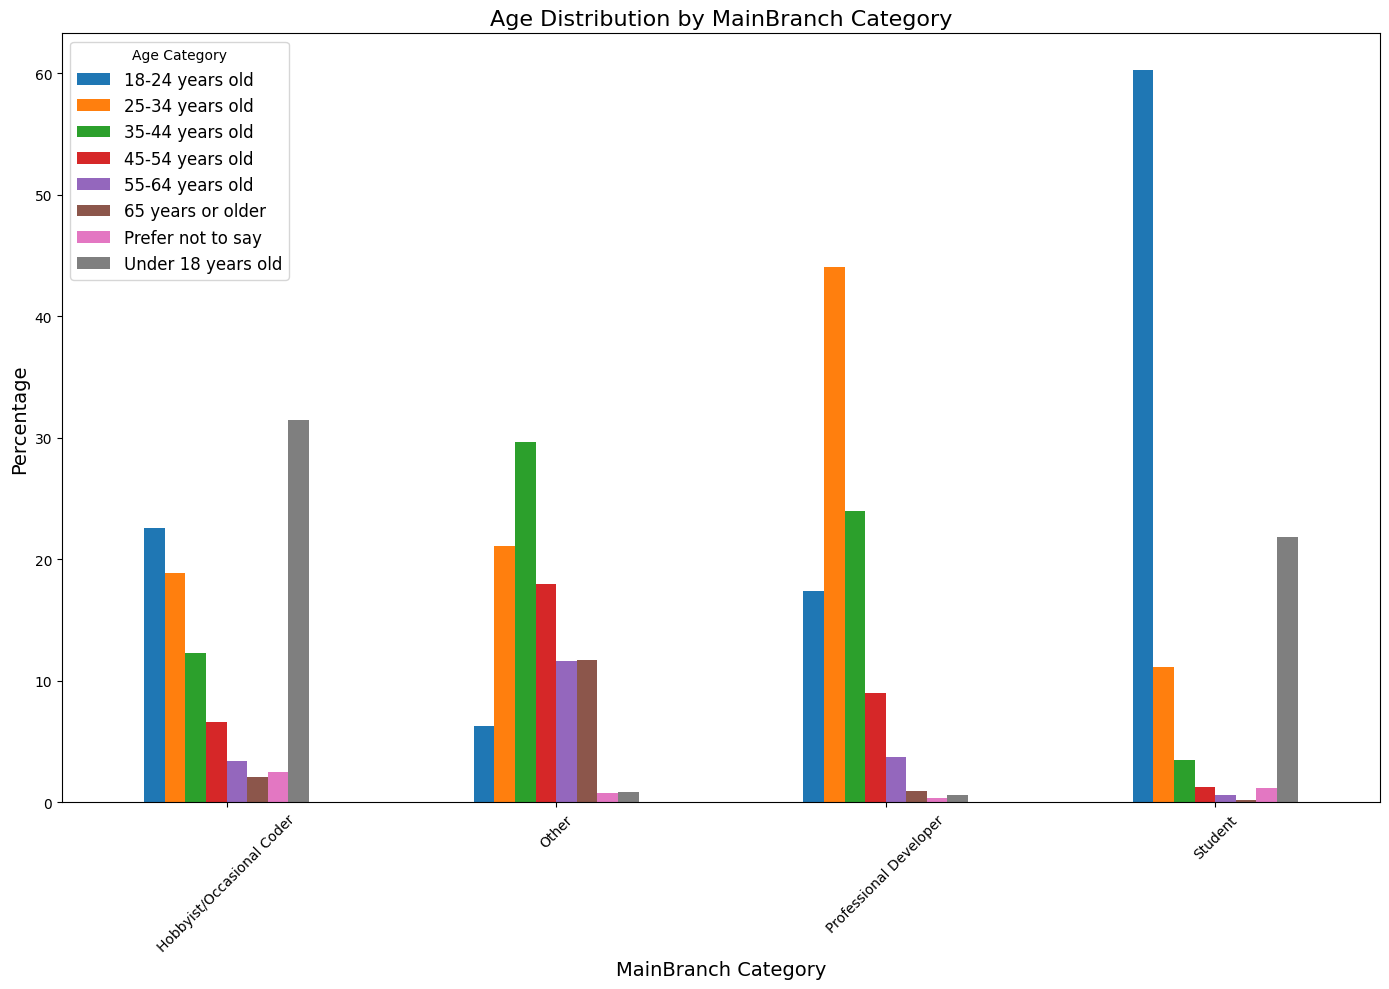

In [17]:
# Age distribution by MainBranchCategory

plt.figure(figsize=(12, 6))
age_counts = pd.crosstab(df['MainBranchCategory'], df['Age'])
age_pct = age_counts.div(age_counts.sum(axis=1), axis=0) * 100

ax = age_pct.plot(kind='bar', figsize=(14, 10))
plt.title('Age Distribution by MainBranch Category', fontsize=16)
plt.xlabel('MainBranch Category', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Age Category', fontsize=12)
plt.tight_layout()
plt.show()

Professional Developers are predominantly in the 25-34 age range, followed by 35-44.
Students are predominantly in the 18-24 age range.H
Most Hobbyist are under the age of 18.
Most common age range of the Others group is 35-44 age.

<Figure size 1200x600 with 0 Axes>

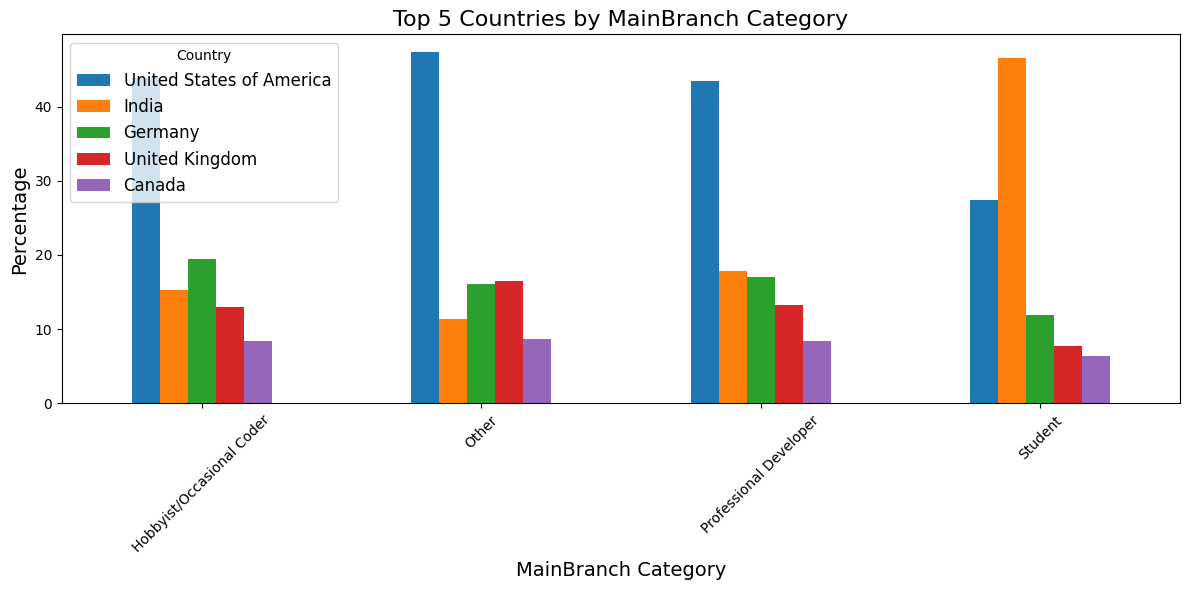

In [18]:
# Country distribution by MainBranchCategory
plt.figure(figsize=(12, 6))
country_counts = pd.crosstab(df['MainBranchCategory'], df['Country'])
top_countries = country_counts.sum().nlargest(5).index
country_counts_top = country_counts[top_countries]
country_pct = country_counts_top.div(country_counts_top.sum(axis=1), axis=0) * 100

ax = country_pct.plot(kind='bar', figsize=(12, 6))
plt.title('Top 5 Countries by MainBranch Category', fontsize=16)
plt.xlabel('MainBranch Category', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Country', fontsize=12)
plt.tight_layout()
plt.show()

United States of America has highest number of Professional Developers and Hobbyist.
India has the highest number of Students.
United Kingdom and Germany complete the top five countries across most categories.

<Figure size 1400x1000 with 0 Axes>

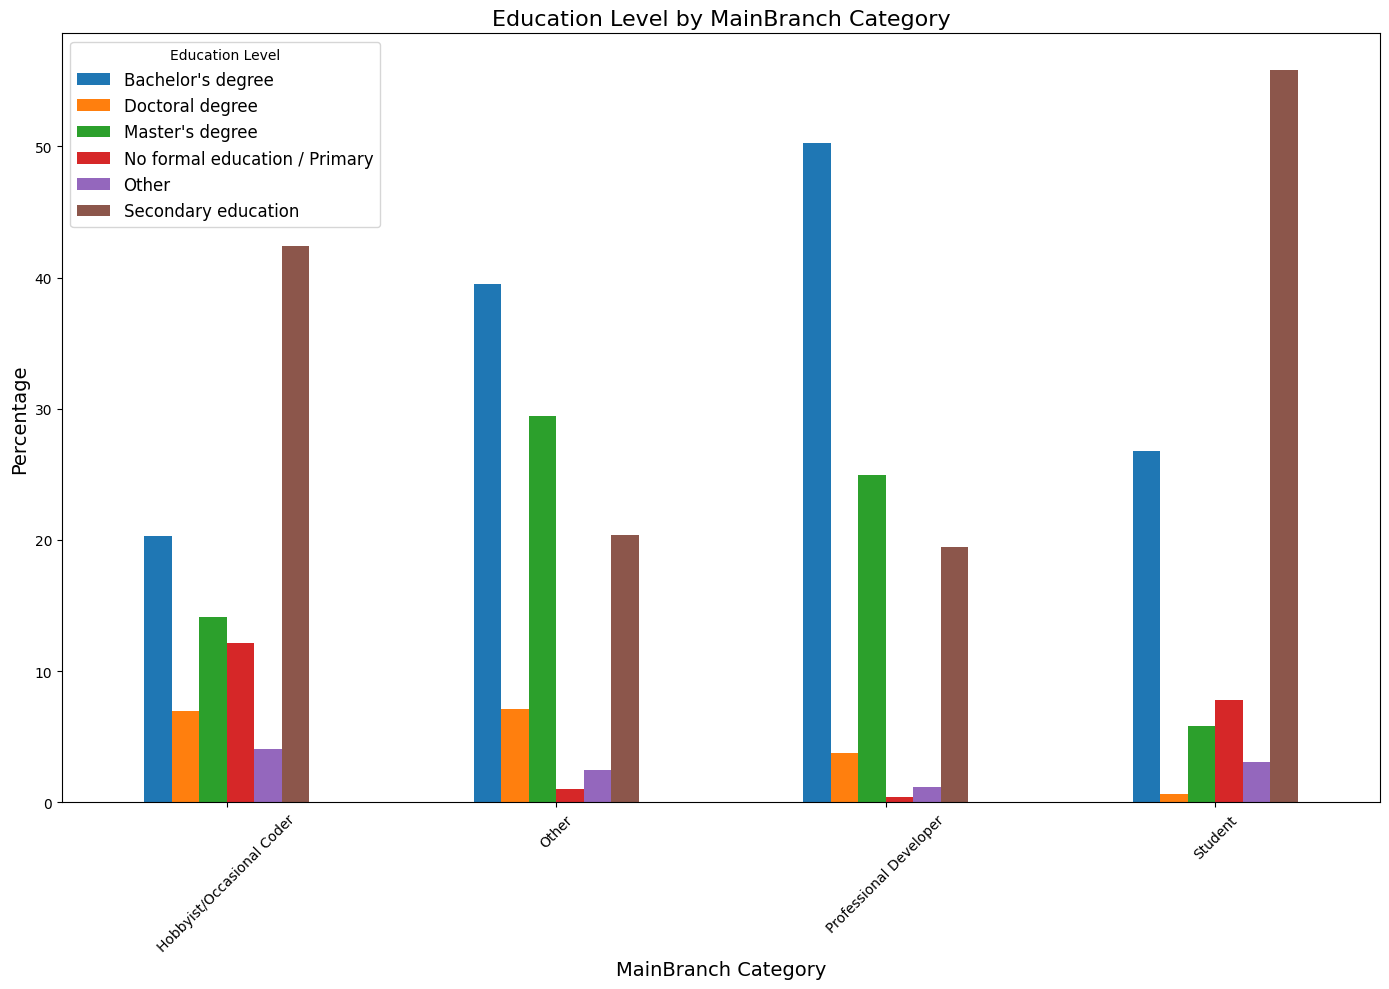

In [19]:
# EdLevel distribution by MainBranchCategory
plt.figure(figsize=(14, 10))
edlevel_counts = pd.crosstab(df['MainBranchCategory'], df['EdLevel'])
edlevel_pct = edlevel_counts.div(edlevel_counts.sum(axis=1), axis=0) * 100

ax = edlevel_pct.plot(kind='bar', figsize=(14, 10))
plt.title('Education Level by MainBranch Category', fontsize=16)
plt.xlabel('MainBranch Category', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Education Level', fontsize=12)
plt.tight_layout()
plt.show()

Bachelor's Degree is the most common education lvel amongst Professional developers.
Masters degrees are most common in the 'other category'.
Secondary education is most common for Students and Hobbyists.

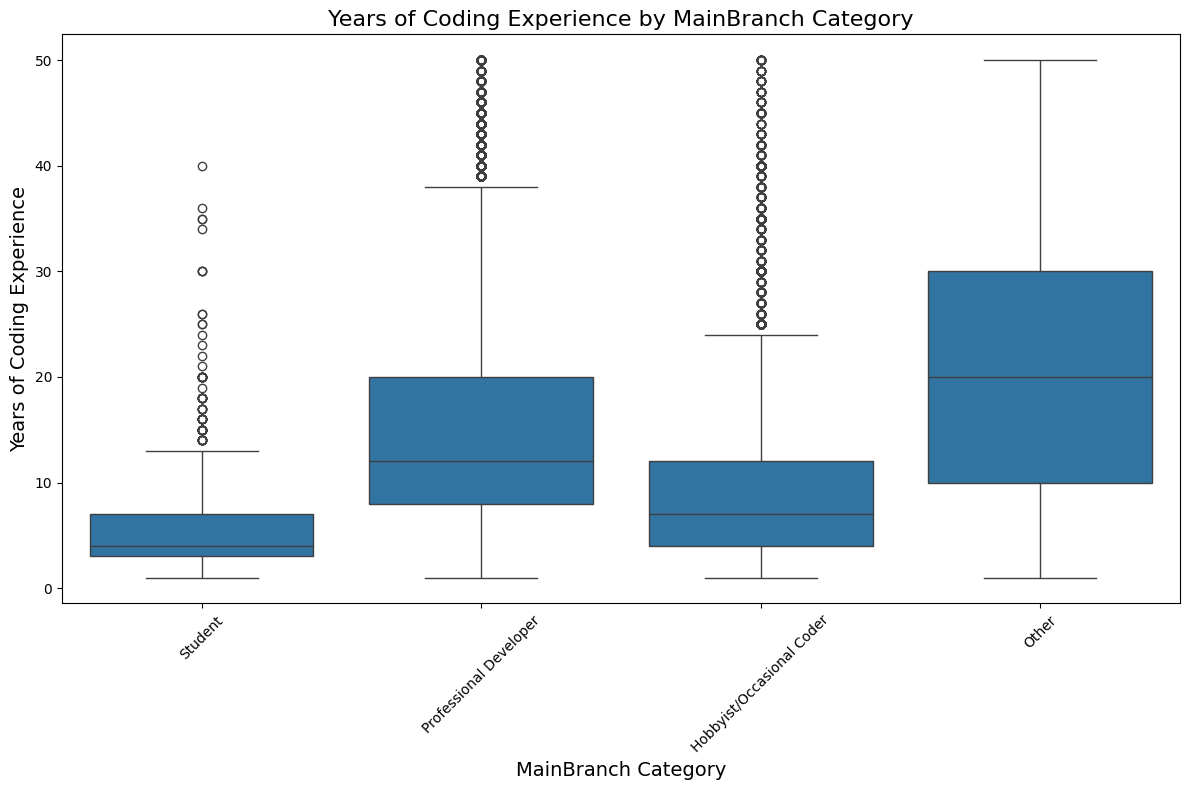

                            mean  median    std  min   max
MainBranchCategory                                        
Hobbyist/Occasional Coder  10.44     7.0   9.91  1.0  50.0
Other                      21.82    20.0  12.71  1.0  50.0
Professional Developer     14.99    12.0   9.99  1.0  50.0
Student                     5.15     4.0   3.40  1.0  40.0


In [20]:
# YearsCode distribution by MainBranchCategory

# Convert YearsCode to numeric
if df['YearsCode'].dtype == 'object':
    # Handle common text responses
    df['YearsCode'] = df['YearsCode'].str.replace('Less than 1 year', '0')  # Convert to numeric
    df['YearsCode'] = df['YearsCode'].str.replace('More than 50 years', '50')  # Remove any '+' signs
    df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')

plt.figure(figsize=(12, 8))
sns.boxplot(x='MainBranchCategory', y='YearsCode', data=df)
plt.title('Years of Coding Experience by MainBranch Category', fontsize=16)
plt.xlabel('MainBranch Category', fontsize=14)
plt.ylabel('Years of Coding Experience', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

yearscode_stats = df.groupby('MainBranchCategory')['YearsCode'].agg(['mean', 'median', 'std', 'min', 'max']).round(2)
print(yearscode_stats)


Professional Developers have the highest average years of experience (14.99 years, median 12 years).
Others also show substantial coding experience (21.82 years, median 20 years).
Students have the least experience (5.15 years, median 4 years).

 2. Technology Trends and Preferences

    1. What are the top 5 most popular databases and programming languages that GitHub users currently use and want to use in the future?


In [21]:
# Dynamic plotting function
def plot_top_5(df, series, title='Top 5', xlabel='Category', ylabel='Percentage'):
    counts = series.value_counts()
    counts = pd.to_numeric(counts, errors='coerce')

    # Calculate percentages
    percentages = (counts / len(df)) * 100

    # Get top 5
    percentages_top5 = percentages.head(5)

    # Plot using plt
    plt.figure(figsize=(8, 5))
    plt.bar(percentages_top5.index, percentages_top5.values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


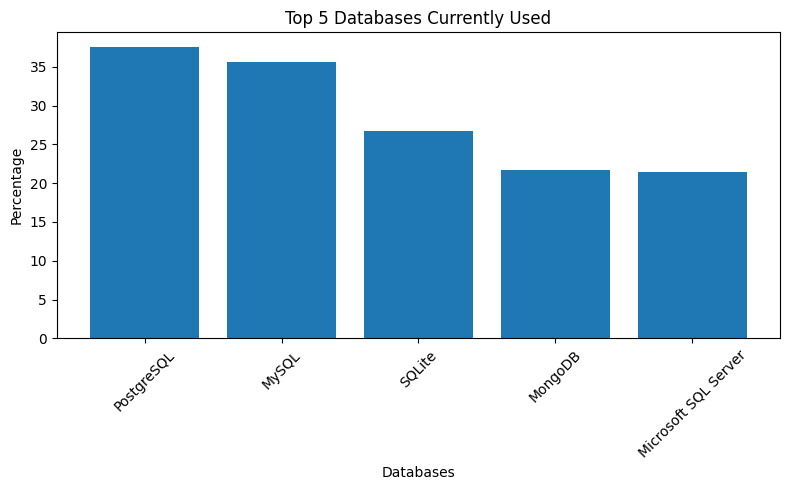

DatabaseHaveWorkedWith
PostgreSQL              39443
MySQL                   37376
SQLite                  28124
MongoDB                 22769
Microsoft SQL Server    22455
Name: count, dtype: int64


In [22]:
# DatabaseHaveWorkedWith
database_used = df['DatabaseHaveWorkedWith'].str.split(';').explode().reset_index(drop=True)
plot_top_5(df, database_used, title='Top 5 Databases Currently Used', xlabel='Databases')
print(database_used.value_counts().head(5))

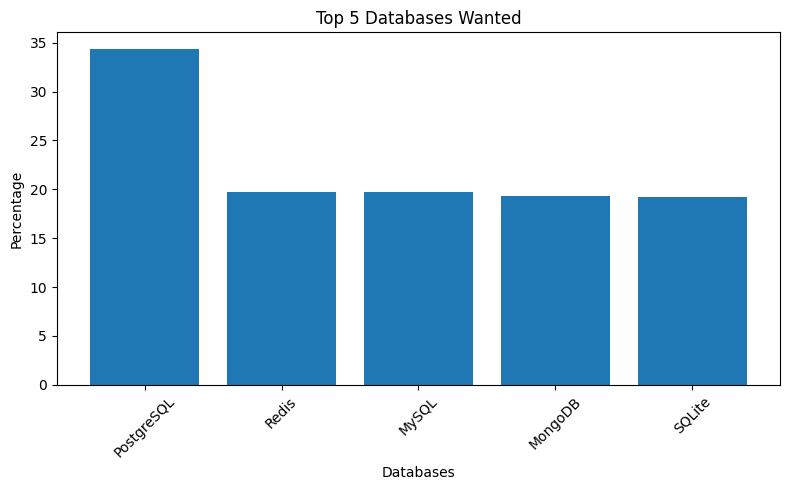

DatabaseWantToWorkWith
PostgreSQL    36045
Redis         20739
MySQL         20657
MongoDB       20226
SQLite        20124
Name: count, dtype: int64


In [23]:
# 'DatabaseWantToWorkWith'

database_want = df['DatabaseWantToWorkWith'].str.split(';').explode().reset_index(drop=True)
plot_top_5(df, database_want, title='Top 5 Databases Wanted', xlabel='Databases')
print(database_want.value_counts().head(5))

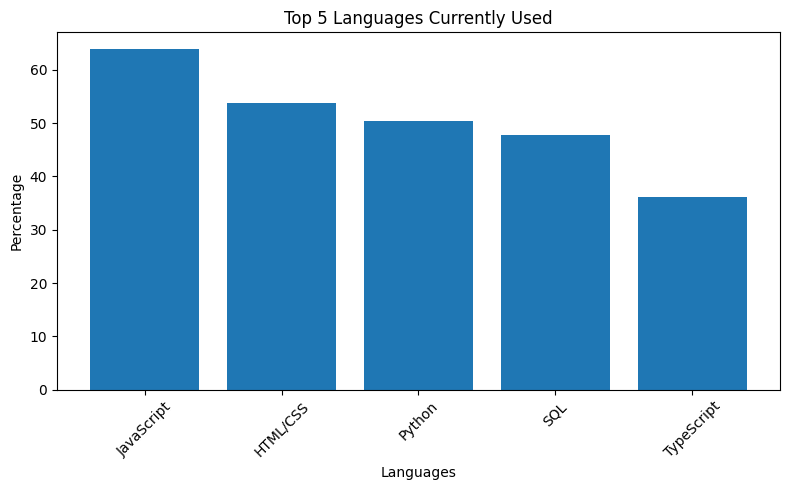

LanguageHaveWorkedWith
JavaScript    67018
HTML/CSS      56460
Python        52830
SQL           50231
TypeScript    37973
Name: count, dtype: int64


In [24]:
#LanguageHaveWorkedWith

language_used = df['LanguageHaveWorkedWith'].str.split(';').explode().reset_index(drop=True)
plot_top_5(df, language_used, title='Top 5 Languages Currently Used', xlabel='Languages')
print(language_used.value_counts().head(5))

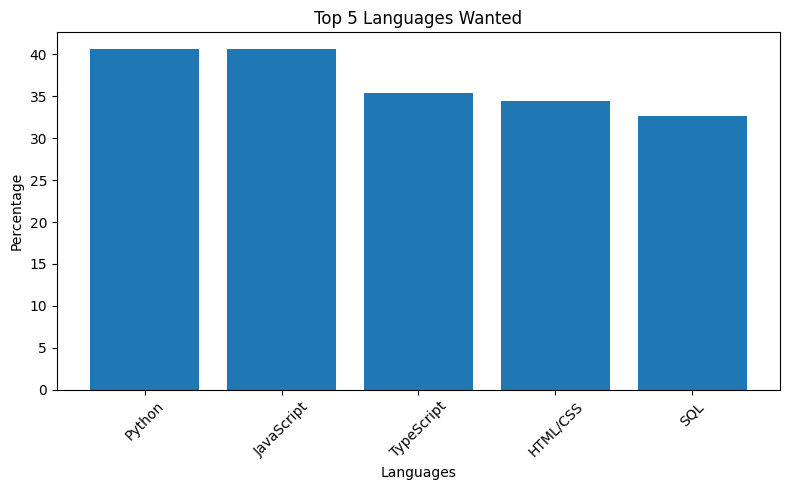

LanguageWantToWorkWith
Python        42635
JavaScript    42628
TypeScript    37157
HTML/CSS      36189
SQL           34297
Name: count, dtype: int64


In [25]:
#LanguageWantToWorkWith

language_want = df['LanguageWantToWorkWith'].str.split(';').explode().reset_index(drop=True)
plot_top_5(df, language_want, title='Top 5 Languages Wanted', xlabel='Languages')
print(language_want.value_counts().head(5))

These findings show the continued dominance of JavaScript and Python in the programming ecosystem, while PostgreSQL leads database preferences. Notably, Redis appears in the top databases users want to use but not in the currently used list, indicating growing interest in this technology.

    How have the usage trends of the top 5 databases and programming languages changed over three years?

In [26]:
#dynamically plot the top languages/datbases overtime

def plot_top_5_over_time(df, series, title='Usage Over Time'):
    # Group by year and language, count occurrences
    counts = df.groupby(['year', series]).size().unstack(fill_value=0)

    # Get top N languages by total usage
    top_5 = series.value_counts().head(5).index

    # Plot setup
    plt.figure(figsize=(12, 7))

    for language in top_5:
        if language in counts.columns:
            plt.plot(counts.index, counts[language],
                    marker='o', linestyle='-', label=language)

    # Plot customization
    plt.title(title, fontsize=14, pad=15)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Usage Count', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Rotate x-ticks and tighten layout
    plt.xticks(counts.index.unique(), rotation=45)
    plt.tight_layout()
    plt.show()

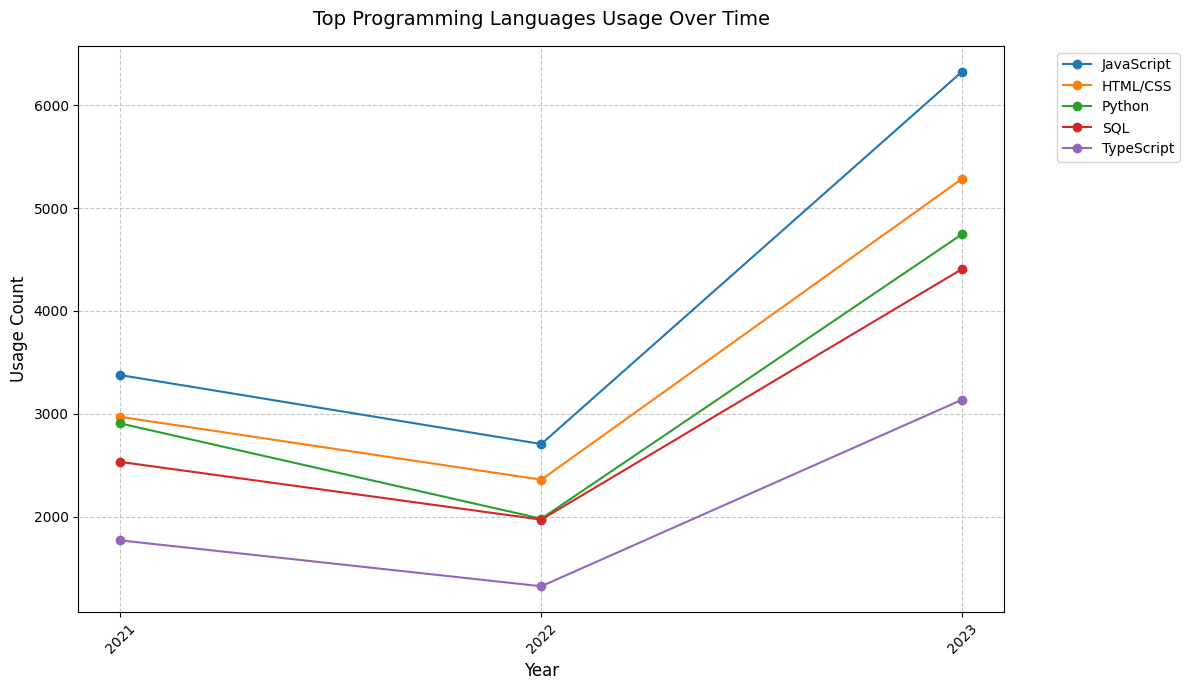

In [27]:

# Top 5 Programming languages Over Time
plot_top_5_over_time(df, series=language_used, title='Top Programming Languages Usage Over Time')


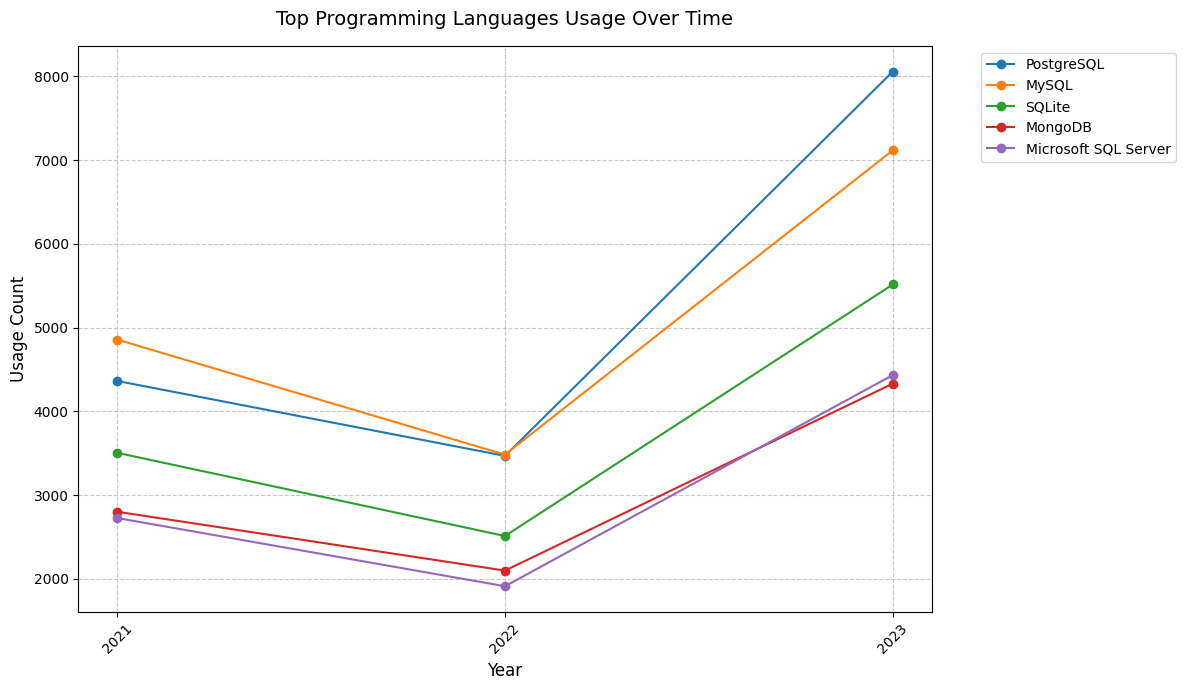

In [28]:
# Top 5 databases Over time

plot_top_5_over_time(df, series=database_used, title='Top Programming Languages Usage Over Time')


These trends indicate the growing popularity of TypeScript in the language category and PostgreSQL in the database category.

 3. Relationship Analysis

	1. How does YearsCode correlate with the use of the top 5 databases and programming languages currently in use?

                           mean  median
Tech                                   
Microsoft SQL Server  16.845112    14.0
MongoDB               11.656990     9.0
MySQL                 13.164277    10.0
PostgreSQL            14.170322    11.0
SQLite                14.338003    11.0


C:\Users\tiset\AppData\Local\Temp\ipykernel_27140\2413512653.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tech', y='YearsCode', data=filtered, palette='pastel' )


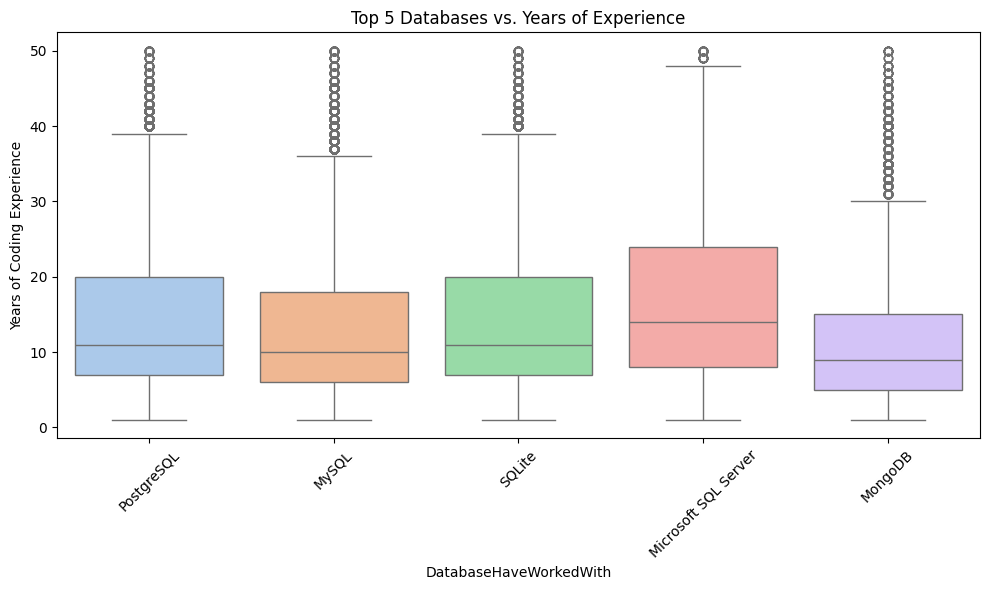

                 mean  median
Tech                         
HTML/CSS    13.094173    10.0
JavaScript  13.428258    10.0
Python      12.658622    10.0
SQL         14.839760    12.0
TypeScript  13.181787    10.0


C:\Users\tiset\AppData\Local\Temp\ipykernel_27140\2413512653.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tech', y='YearsCode', data=filtered, palette='pastel' )


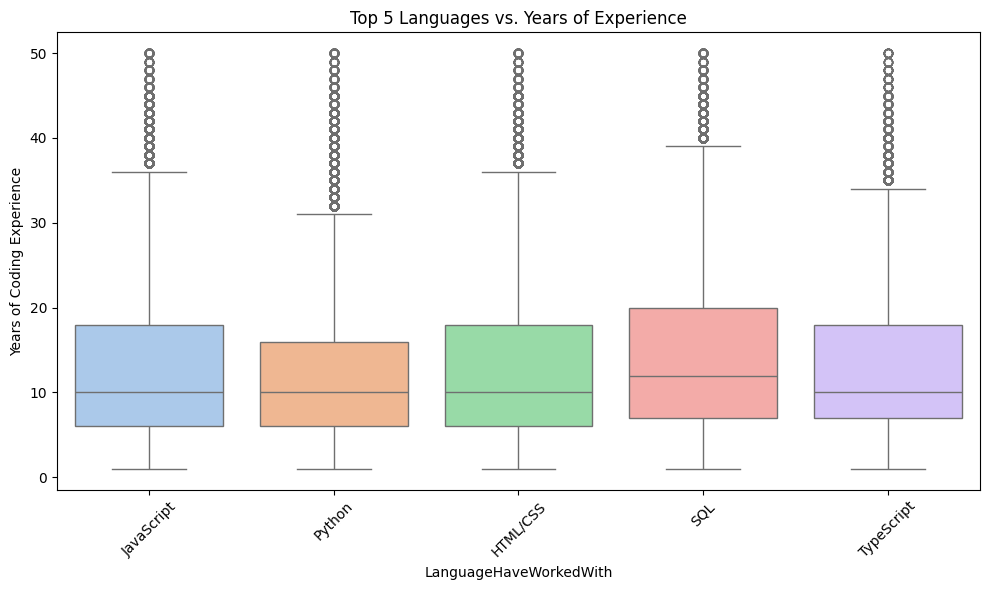

In [29]:
def correlation(df, column_name, title=''):
    # Explode the multi-select column
    exploded = df.assign(Tech=df[column_name].str.split(';')).explode('Tech')

    # Get top N tools
    top_tech = exploded['Tech'].value_counts().head(5).index

    # Filter for only top tech
    filtered = exploded[exploded['Tech'].isin(top_tech)]
    stats = filtered.groupby('Tech')['YearsCode'].agg(['mean', 'median'])
    print(stats)
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Tech', y='YearsCode', data=filtered, palette='pastel' )
    plt.title(title or f'Years of Coding Experience vs. Top 5 in {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Years of Coding Experience')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage:
correlation(df, 'DatabaseHaveWorkedWith', title='Top 5 Databases vs. Years of Experience')
correlation(df, 'LanguageHaveWorkedWith', title='Top 5 Languages vs. Years of Experience')


	2.2 GitHub User Report

**Demographics and Trends from 2021 to 2023:**

Professional Developers form the largest user segment (78765 users in the dataset), showing substantial growth from 21416 users in 2021 to 40408 in 2023, nearly doubling in size.
The student category has seen a significant decrease from 2021 to 2023, suggesting a shift in how users identify themselves or changes in GitHub's survey methodology.
Hobbyist/Occasional Coders have slightly decreased from 2021 to 2023, indicating a potential shift toward more professional use of the platform.

**Age Distribution:**

Professional Developers are predominantly in the 25-34 age range, followed by 35-44.
Students are primarily in the 18-24 age bracket.
Hobbyists show a broader age distribution, with many under 18.

**Geographic Distribution:**

The top 10 countries with the most GitHub users are: United States, India, Germany, United Kingdom, Canada, France, Poland, Brazil, Netherlands, and Australia.
This indicates strong presence in North America and Europe.
United States leads across all categories,

**Education Levels:**

Bachelor's degree holders form the largest group (46458), followed by those with secondary education (26313) and Master's degrees (23533).
This suggests GitHub is widely used across various education levels, from self-taught developers to those with advanced degrees.

**Most Popular Technologies**

Programming Language Currently Used 
- JavaScript (67018 users)

Programming Languages Wanted to Use
- Python (42635 users)

Databases Currently Used
- PostgreSQL (39443 users)

Databases Wanted to Use
- PostgreSQL (36045 users)

**Correlation Between Experience and Technology Usage**

Programming Languages and Experience
- SQL users have the highest average experience.

Databases and Experience
- Microsoft SQL Server users have the highest average experience.


**Recommendations for GitHub**

- Create beginner-friendly resources focused on Python and MongoDB, which are popular among less experienced developers.

- Improve integration with PostgreSQL and TypeScript, which show the strongest growth trends.

- Simplify the onboarding for younger users in the Under 18 and 18-24 age bracket, who are the future user base.

- Add better support for Redis, which has a low current usage rate but is high on the wanted list.